#**Genre Classification**

In [0]:
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv
from sklearn import preprocessing , neighbors ,svm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [0]:
from google.colab import drive
drive.mount('/content/drive')

 **Plotting one from each genre in a spectogram**

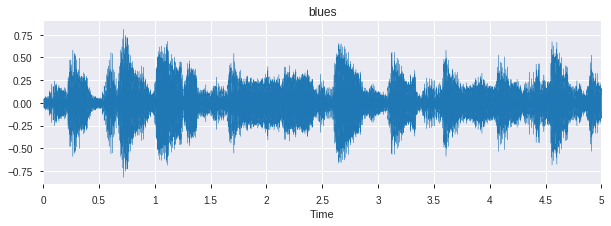

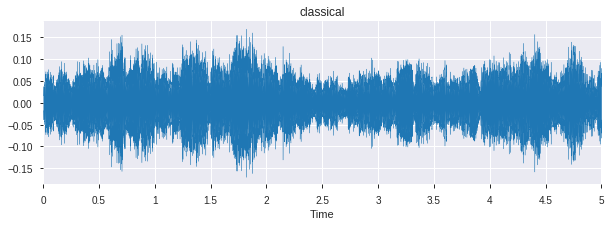

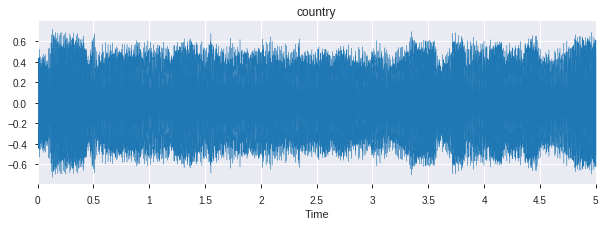

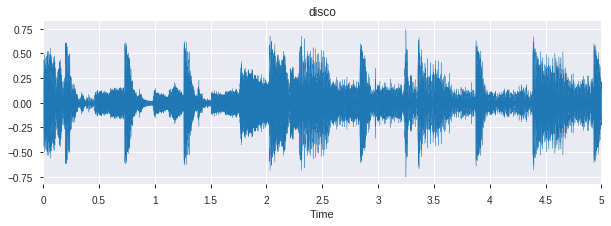

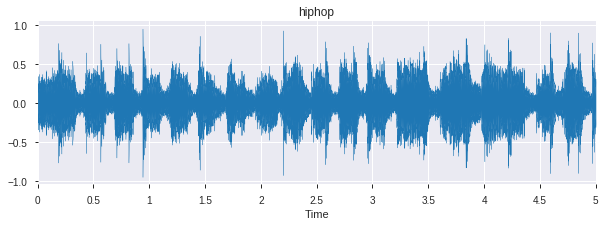

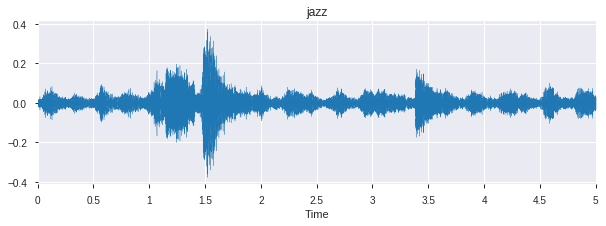

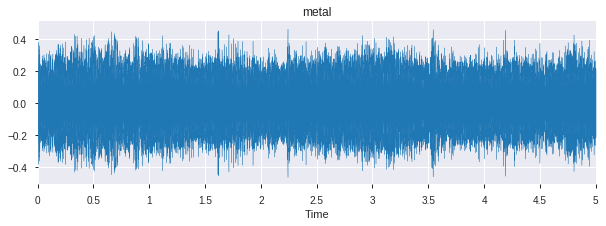

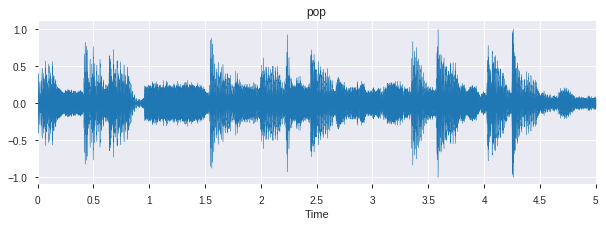

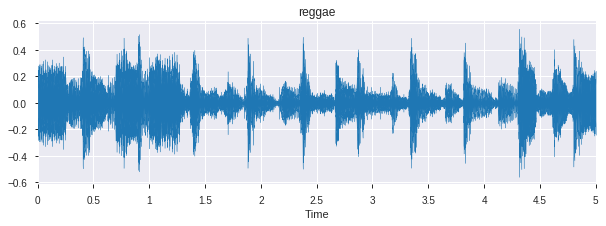

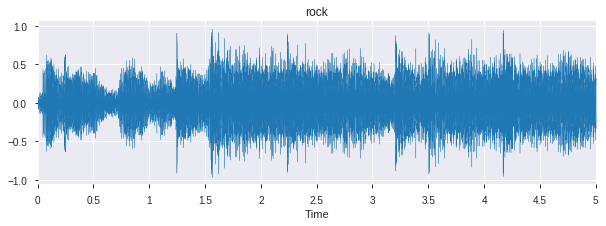

In [0]:
genres='blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:     
    song=f'./genres/{g}/{g}.00000.wav'
    x, sr=librosa.load(song, mono=True, duration=5)
    plt.figure(figsize=(10, 3))
    plt.title(g)
    librosa.display.waveplot(x, sr)

**Extracting features to csv file**

In [0]:
#extracting features to .csv file

header='filename chroma_stft rms spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header+=f' mfcc{i}'
header+=' label'
header=header.split()

file=open('data.csv', 'w', newline='')
with file:
    writer=csv.writer(file)
    writer.writerow(header)
genres='blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'/content/Genre-Classification/genres/{g}'):
        song=f'/content/Genre-Classification/genres/{g}/{filename}'
        x, sr = librosa.load(song,mono=True,duration=30)
        chroma_stft=librosa.feature.chroma_stft(x,sr)
        rms=librosa.feature.rms(x)
        spec_cent=librosa.feature.spectral_centroid(x,sr)
        spec_bw=librosa.feature.spectral_bandwidth(x,sr)
        rolloff=librosa.feature.spectral_rolloff(x,sr)
        zcr=librosa.feature.zero_crossing_rate(x)
        mfcc=librosa.feature.mfcc(x,sr)
        to_append=f'{filename} {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append+=f' {np.mean(e)}'
        to_append+=f' {g}'
        file=open('data.csv', 'a', newline='')
        with file:
            writer=csv.writer(file)
            writer.writerow(to_append.split())


In [21]:
data=pd.read_csv('/content/Genre-Classification/data.csv')
data.head()

,filename,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00046.wav,0.387851,0.102582,1912.506881,2361.474653,4776.862782,0.058426,-182.638291,90.676797,14.119085,67.549826,2.693214,38.430529,-8.410898,24.127446,-13.781991,4.835996,-16.682031,5.811708,-5.149533,0.192984,-14.480762,6.862884,-4.442362,-2.986889,-4.816248,5.400325,blues
1,blues.00081.wav,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,-46.809993,40.932634,-21.463776,24.816275,-18.945571,15.253459,-15.050104,12.262823,-15.234050,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
2,blues.00008.wav,0.409037,0.142438,1719.213163,2031.643884,3781.318802,0.064028,-121.361024,122.513116,-14.742130,46.143444,-8.165334,20.176526,-19.172478,23.055617,-11.830503,21.177009,-6.721190,7.010945,-12.741833,5.066005,-5.175478,-1.444025,-7.037070,2.697451,3.409809,-2.698353,blues
3,blues.00053.wav,0.412501,0.168358,2171.221742,1954.383785,4237.132712,0.132802,-76.717959,105.753530,-43.181755,60.945850,-8.758631,21.227079,-12.864846,18.603844,-11.384939,14.541766,-6.047970,12.726959,-9.366809,1.350859,-3.609972,6.997609,-4.053008,-0.271427,-3.696092,-0.504041,blues
4,blues.00085.wav,0.315363,0.150218,1312.308199,1673.915613,2638.117381,0.059416,-180.123596,131.420259,0.566188,43.152929,14.135186,25.628555,-5.313080,12.040290,-13.536841,-1.090993,-7.605675,2.718054,0.772589,1.997588,-6.093858,3.484042,-8.341479,3.204648,-0.926944,-2.243686,blues


In [22]:
print(len(data))
print(data.isnull().sum())
print(data['label'].value_counts())

1000
filename              0
chroma_stft           0
rms                   0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64
classical    100
rock         100
country      100
metal        100
blues        100
jazz         100
pop          100
reggae       100
hiphop       100
disco        100
Name: label, dtype: int64


In [0]:
data=data.drop(['filename'],axis=1)

**Standard Scaling data and Encoding Label**

In [24]:
def scale_data(df, column_list):
    for column in column_list:
        df[column] = df[column].astype('float')
        encoder = preprocessing.StandardScaler()
        df[column] = encoder.fit_transform(df[column].values.reshape(-1,1))
        print("The ",column, "is encoded")
    return(df)
  
def encode_categorical(df, column_list):
    for column in column_list:
        df[column] = df[column].astype('str')
        encoder = preprocessing.LabelEncoder()
        encoded_list = encoder.fit_transform(df[column])
#         print(encoded_list)
#         print(len(encoded_list))
        encoded_series = pd.Series(encoded_list)
        df[column] = encoded_series
        print("The ", column, "is encoded ")
    return(df)

column=['chroma_stft', 'rms', 'spectral_centroid', 'spectral_bandwidth',
       'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
       'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11',
       'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18',
       'mfcc19', 'mfcc20']
data = scale_data(data,column)
data = encode_categorical(data, ['label'])
data.head()

The  chroma_stft is encoded
The  rms is encoded
The  spectral_centroid is encoded
The  spectral_bandwidth is encoded
The  rolloff is encoded
The  zero_crossing_rate is encoded
The  mfcc1 is encoded
The  mfcc2 is encoded
The  mfcc3 is encoded
The  mfcc4 is encoded
The  mfcc5 is encoded
The  mfcc6 is encoded
The  mfcc7 is encoded
The  mfcc8 is encoded
The  mfcc9 is encoded
The  mfcc10 is encoded
The  mfcc11 is encoded
The  mfcc12 is encoded
The  mfcc13 is encoded
The  mfcc14 is encoded
The  mfcc15 is encoded
The  mfcc16 is encoded
The  mfcc17 is encoded
The  mfcc18 is encoded
The  mfcc19 is encoded
The  mfcc20 is encoded
The  label is encoded 


,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.112442,-0.431763,-0.404312,0.226042,0.130345,-1.081260,-0.380885,-0.283412,1.062574,1.876308,0.314317,2.010705,-0.330219,1.339302,-0.819590,-0.364791,-1.564191,0.199600,-0.057119,-0.317269,-2.177857,1.248661,-0.104418,-0.903556,-0.662672,1.693380,0
1,0.019489,1.787196,-0.118629,-0.543552,-0.238627,0.565253,1.173317,0.248491,-1.747268,0.278508,-1.663099,0.860355,-1.390401,0.490836,-0.972743,0.571284,-1.351740,1.469329,-1.463162,1.154636,-0.474364,-0.178688,-0.629267,0.118593,-1.396502,1.046464,0
2,0.371867,0.175309,-0.674425,-0.400924,-0.502155,-0.947293,0.230753,0.733195,-0.268407,0.591307,-0.574530,0.468314,-1.413236,1.236822,-0.583904,1.694826,-0.102716,0.378218,-1.288070,0.655975,-0.267899,-0.566335,-0.674887,0.566346,1.528783,-0.418047,0
3,0.414280,0.570114,-0.042779,-0.547785,-0.212562,0.697502,0.676357,0.198023,-1.579946,1.479879,-0.623095,0.557082,-0.778452,0.811175,-0.530093,0.858521,-0.003939,1.229582,-0.740873,-0.086017,0.053429,1.278097,-0.018815,-0.201370,-0.364258,0.154038,0
4,-0.775189,0.293807,-1.243044,-1.080919,-1.228467,-1.057570,-0.355784,1.017621,0.437561,0.411790,1.250922,0.928989,-0.018463,0.183616,-0.789983,-1.111827,-0.232489,-0.261180,0.903043,0.043148,-0.456402,0.510410,-0.961673,0.697502,0.373455,-0.299510,0


In [6]:
import pandas_profiling as pp
pp.ProfileReport(data)

Number of variables,27
Number of observations,1000
Total Missing (%),0.0%
Total size in memory,211.1 KiB
Average record size in memory,216.1 B
Numeric,25
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,2


In [0]:
#dropping spectral bandwidth as it is highly correlated with rolloff and spectral centroid
data=data.drop(['spectral_bandwidth'],axis=1)

In [26]:
#removing duplicates
print(len(data))
data.drop_duplicates(keep=False,inplace=True)
print(len(data))

1000
974


In [0]:
y = np.array(data['label'])
x = np.array(data.iloc[:, :-1], dtype = float)

In [0]:
#splitting the data

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,shuffle=True,stratify=y)

**KNN Classification Algorithm**

In [33]:
neigh=neighbors.KNeighborsClassifier()
neigh.fit(x_train,y_train)
accuracy = neigh.score(x_test, y_test)
print(accuracy)

0.6102564102564103


**SVM Classification Algorithm**

In [34]:
svmc=svm.SVC()
svmc.fit(x_train,y_train)
accuracy = svmc.score(x_test, y_test)
print(accuracy)

0.7025641025641025


**Decision Tree Algorithm**

In [35]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion = 'entropy')
drugTree.fit(x_train, y_train)
accuracy = drugTree.score(x_test, y_test)
print(accuracy)

0.4307692307692308


**Logistic Regression**

In [36]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0).fit(x_train, y_train)
accuracy = LR.score(x_test, y_test)
print(accuracy)

0.6102564102564103


In [0]:
from sklearn.metrics import f1_score

**F1 Score**

In [37]:
#F1 Score
y_pred_knn=neigh.predict(x_test)
y_pred_dt=drugTree.predict(x_test)
y_pred_svm=svmc.predict(x_test)
y_pred_lr=LR.predict(x_test)
f_knn=f1_score(y_test,y_pred_knn,average='micro')
f_dt=f1_score(y_test,y_pred_dt,average='micro')
f_svm=f1_score(y_test,y_pred_svm,average='micro')
f_lr=f1_score(y_test,y_pred_lr,average='micro')
print(f_knn,f_dt,f_svm,f_lr)

0.6102564102564103 0.43076923076923074 0.7025641025641025 0.6102564102564103



Algorithm | F1
--- | ---
KNN | 0.61
SVM | 0.70
Decision Tree | 0.43
Logistic Regression | 0.61